# Import Required Libraries
Import the necessary libraries, including pandas and scikit-learn.

In [287]:
# Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from IPython.display import Markdown
import seaborn as sns
import numpy as np

# Load Dataset
Load the dataset into a pandas DataFrame.

In [288]:
# Load Dataset
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/complete_dataset.csv"  # Replace with your dataset file path
df = pd.read_csv(file_path)  # Load the dataset into a pandas DataFrame

# Display the first few rows of the DataFrame
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


# Handle Missing Values
Identify and handle missing values in the dataset using techniques such as imputation or removal.

In [289]:
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/complete_dataset.csv"
df = pd.read_csv(file_path)

# Handle Missing Values
print("Missing values in each column before handling:\n", df.isnull().sum())

# Option 1: Forward fill followed by backward fill
df_cleaned = df.ffill().bfill()

# Option 2: Impute missing values using bfill
df_imputed = df.copy()

# Fill numerical columns using backward fill
numeric_columns = df_imputed.select_dtypes(include=['number']).columns
df_imputed[numeric_columns] = df_imputed[numeric_columns].bfill()

# Fill categorical columns using backward fill
categorical_columns = df_imputed.select_dtypes(include=['object']).columns
df_imputed[categorical_columns] = df_imputed[categorical_columns].bfill()

# Encode Categorical Variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_imputed[column] = label_encoder.fit_transform(df_imputed[column])

# Display results
print("Missing values after handling:\n", df_imputed.isnull().sum())
print("Cleaned DataFrame:\n", df_cleaned.head())
print("Imputed DataFrame:\n", df_imputed.head())

Missing values in each column before handling:
 date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64
Missing values after handling:
 date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64
Cleaned DataFrame:
          date      demand        RRP  demand_pos_RRP  RRP_positive  \
0  2015-01-01   99635.030  25.633696       97319.240     26.415953   
1  2015-01-02  129606.010  33.138988      121082.015     38.837661   
2  2015-01-03  142300.540  34.564855      142300.540     34.564855   
3  201

# DEMAND ANALYSIS AND PRICE ANALYSIS


## DAILY DEMAND ANALYSIS

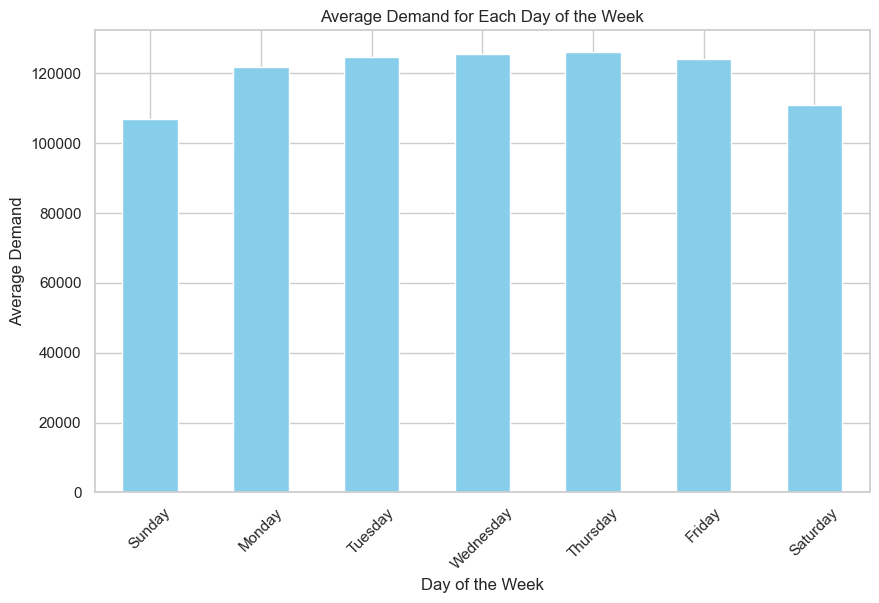

**Daily Demand Analysis:** A bar plot groups the data by the day of the week (Sunday to Saturday) and shows the average demand for each day.

In [290]:
# Demand and Price Analysis
import matplotlib.pyplot as plt
import calendar as cal

# Convert 'date' column to datetime format
import matplotlib.dates as mdates
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

# Add a column for the day of the week
df['day_of_week'] = df.index.day_name()

# Group by day of the week and calculate the average demand
average_demand_by_day = df.groupby('day_of_week')['demand'].mean().reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Plot the average demand for each day of the week
plt.figure(figsize=(10, 6))
average_demand_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Demand for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
display(Markdown("**Daily Demand Analysis:** A bar plot groups the data by the day of the week (Sunday to Saturday) and shows the average demand for each day."))


## Weekly Demand Variations

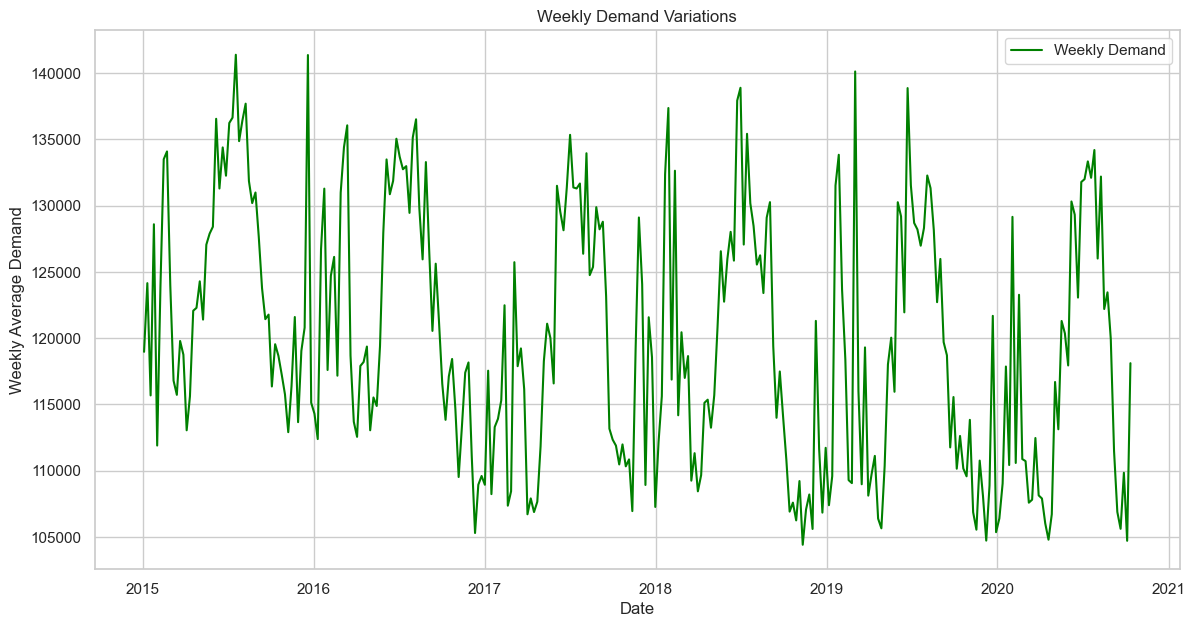

**Weekly Demand Variations:** A line plot that resamples demand data weekly to reveal trends and fluctuations.

In [291]:
# Plot weekly demand variations
weekly_demand = df['demand'].resample('W').mean()
plt.figure(figsize=(14, 7))
plt.plot(weekly_demand, label='Weekly Demand', color='green')
plt.title('Weekly Demand Variations')
plt.xlabel('Date')
plt.ylabel('Weekly Average Demand')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Weekly Demand Variations:** A line plot that resamples demand data weekly to reveal trends and fluctuations."))

## Yearly Demand Variations

C:\Users\saina\AppData\Local\Temp\ipykernel_12936\1418829592.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_demand = df['demand'].resample('Y').mean()


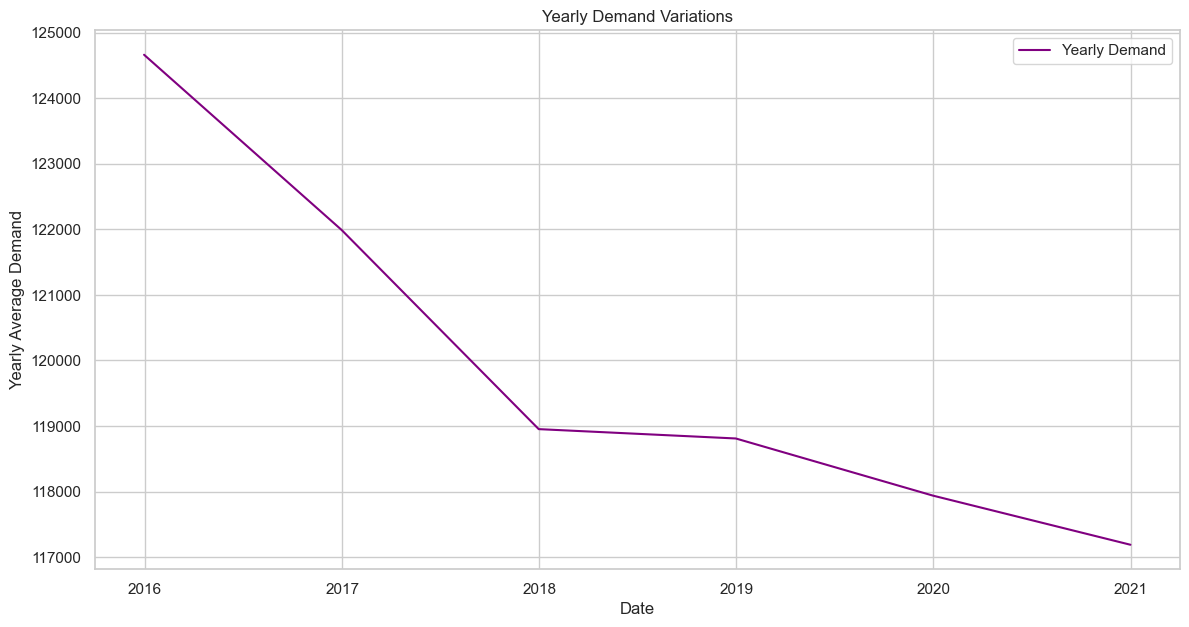

**Yearly Demand Variations:** A line plot aggregating demand by year to highlight long-term trends.

In [292]:
# Plot yearly demand variations
yearly_demand = df['demand'].resample('Y').mean()
plt.figure(figsize=(14, 7))
plt.plot(yearly_demand, label='Yearly Demand', color='purple')
plt.title('Yearly Demand Variations')
plt.xlabel('Date')
plt.ylabel('Yearly Average Demand')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Yearly Demand Variations:** A line plot aggregating demand by year to highlight long-term trends."))


## Demand vs. RRP Relationship

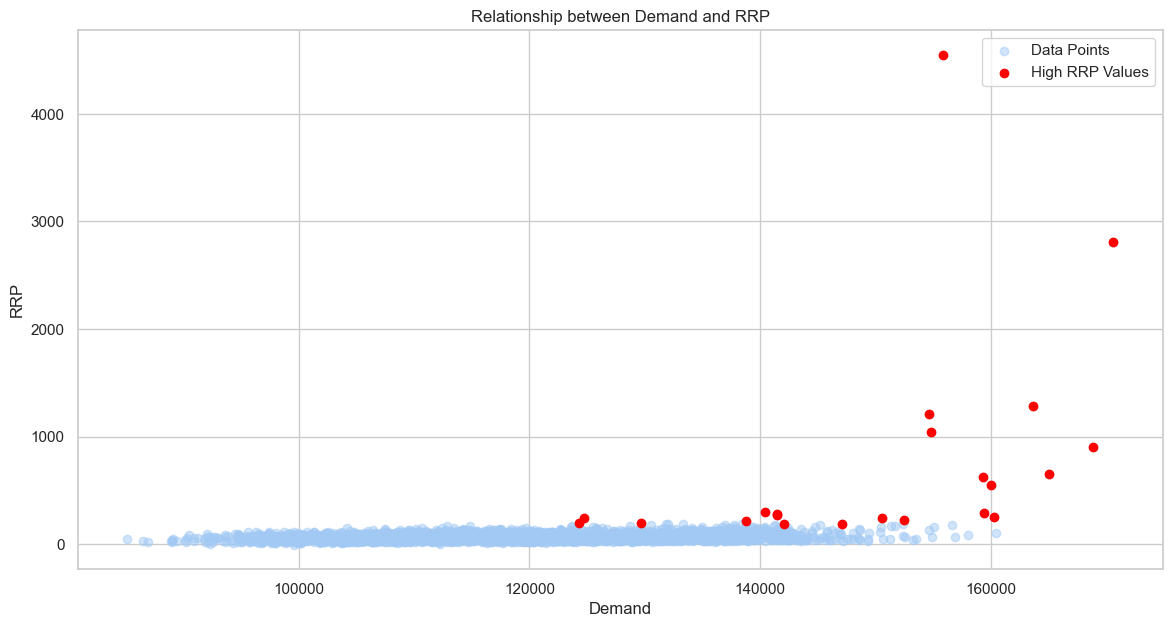

**Demand vs. RRP Relationship:** A scatter plot showing the relationship between demand and RRP with high RRP values (above the 99th percentile) highlighted in red.

In [293]:
# Analyze the relationship between demand and RRP
plt.figure(figsize=(14, 7))

# Identify high RRP values
high_rrp_threshold = df['RRP'].quantile(0.99)
high_rrp = df[df['RRP'] > high_rrp_threshold]

# Plot all data points
plt.scatter(df['demand'], df['RRP'], alpha=0.5, label='Data Points')

# Highlight high RRP values
plt.scatter(high_rrp['demand'], high_rrp['RRP'], color='red', label='High RRP Values')

plt.title('Relationship between Demand and RRP')
plt.xlabel('Demand')
plt.ylabel('RRP')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Demand vs. RRP Relationship:** A scatter plot showing the relationship between demand and RRP with high RRP values (above the 99th percentile) highlighted in red."))


## Monthly Average Demand Analysis

C:\Users\saina\AppData\Local\Temp\ipykernel_12936\674040574.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_demand = df['demand'].resample('M').mean()


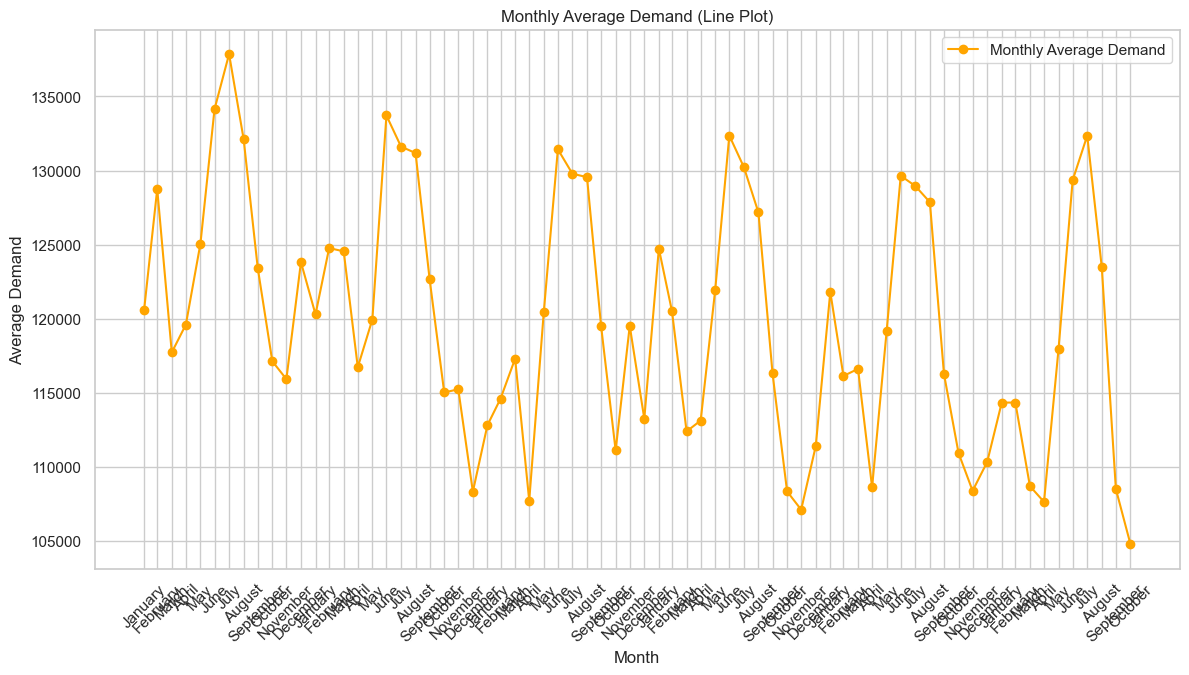

**Monthly Average Demand Analysis:** A line plot representing monthly average demand, displaying seasonal variations throughout the year.

In [294]:
# Plot monthly average demand as a line plot
monthly_demand = df['demand'].resample('M').mean()
plt.figure(figsize=(14, 7))
plt.plot(monthly_demand, marker='o', linestyle='-', color='orange', label='Monthly Average Demand')
plt.title('Monthly Average Demand (Line Plot)')
plt.xlabel('Month')
plt.ylabel('Average Demand')
import calendar
month_names = [calendar.month_name[dt.month] for dt in monthly_demand.index]
plt.xticks(monthly_demand.index, month_names, rotation=45)
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Monthly Average Demand Analysis:** A line plot representing monthly average demand, displaying seasonal variations throughout the year."))

## High Demand and Price Spikes

In [295]:
# Identify periods with high demand and significant price spikes
high_demand = df[df['demand'] > df['demand'].quantile(0.95)]
high_price_spikes = high_demand[high_demand['RRP'] > df['RRP'].quantile(0.95)]
print('Periods with high demand and significant price spikes:')
print(high_price_spikes)

Periods with high demand and significant price spikes:
                demand          RRP  demand_pos_RRP  RRP_positive  \
date                                                                
2015-12-17  152366.300   188.086125      152366.300    188.086125   
2016-01-13  160011.075   545.737820      160011.075    545.737820   
2016-03-08  160285.015   253.032032      160285.015    253.032032   
2016-07-05  142401.795   147.187692      142401.795    147.187692   
2017-02-08  142213.660   135.061279      142213.660    135.061279   
2017-02-09  155060.610   156.699561      151642.620    163.717084   
2017-08-03  151355.430   169.233827      151355.430    169.233827   
2017-11-29  151730.950   166.552647      151730.950    166.552647   
2018-01-18  154648.065  1210.137920      154648.065   1210.137920   
2018-01-19  165070.595   647.574163      165070.595    647.574163   
2018-01-28  159436.690   290.419644      159436.690    290.419644   
2018-02-07  159307.315   624.260934      159307.

# Weather Impact Analysis
### 1. Importing Required Libraries

In [296]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

### 2. Setting Visualization Style

In [297]:
sns.set(style="whitegrid", palette="pastel")

### 3. Removing Extreme Outliers (Excluding Rainfall)

In [298]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load Dataset
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/complete_dataset.csv"
df = pd.read_csv(file_path)

# Handle Missing Values
df_cleaned = df.ffill().bfill()  # Forward fill followed by backward fill

# Function to remove outliers using IQR, excluding "rainfall"
def remove_outliers_iqr(data, exclude_column):
    num_data = data.select_dtypes(include=['number'])  # Select only numerical columns
    if exclude_column in num_data.columns:
        num_data = num_data.drop(columns=[exclude_column])  # Drop "rainfall" from outlier detection

    Q1 = num_data.quantile(0.25)
    Q3 = num_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mask to keep only rows where all numerical values (except "rainfall") are within bounds
    mask = ~((num_data < lower_bound) | (num_data > upper_bound)).any(axis=1)
    
    return data[mask]  # Return the filtered dataset

# Remove outliers except for "rainfall"
df_no_outliers = remove_outliers_iqr(df_cleaned, "rainfall")

# Fill missing values after outlier removal
df_no_outliers = df_no_outliers.bfill()

# Encode Categorical Variables
categorical_columns = df_no_outliers.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_no_outliers[column] = label_encoder.fit_transform(df_no_outliers[column])

# Display results
print("Missing values after handling:\n", df_no_outliers.isnull().sum())
print("Dataset after removing outliers (except for rainfall):\n", df_no_outliers.head())


Missing values after handling:
 date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64
Dataset after removing outliers (except for rainfall):
    date      demand        RRP  demand_pos_RRP  RRP_positive  demand_neg_RRP  \
3     0  104330.715  25.005560      104330.715     25.005560             0.0   
4     1  118132.200  26.724176      118132.200     26.724176             0.0   
5     2  130672.485  31.282311      130672.485     31.282311             0.0   
7     3  142015.655  49.117280      142015.655     49.117280             0.0   
8     4  121801.155  34.490675      121801.155     34.490675             0.0   

   RRP_negative  frac_at_neg_RRP  min_temperature  max_temperature  \
3           0.0              0.0             16.3     

### 4. Outlier Removal for Numerical Variables

In [299]:
import pandas as pd

# Load Dataset
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/complete_dataset.csv"
df = pd.read_csv(file_path)

# Define numerical variables
numerical_vars = ['demand', 'RRP', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']

# Function to remove extreme outliers using the IQR method
def remove_extreme_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove extreme outliers except for "rainfall"
filtered_vars = [var for var in numerical_vars if var != 'rainfall' and df[var].nunique() > 10]
df_cleaned = remove_extreme_outliers(df, filtered_vars)

# Save the cleaned dataset
cleaned_file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: ../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv


### 5. Visualizing Data Distributions

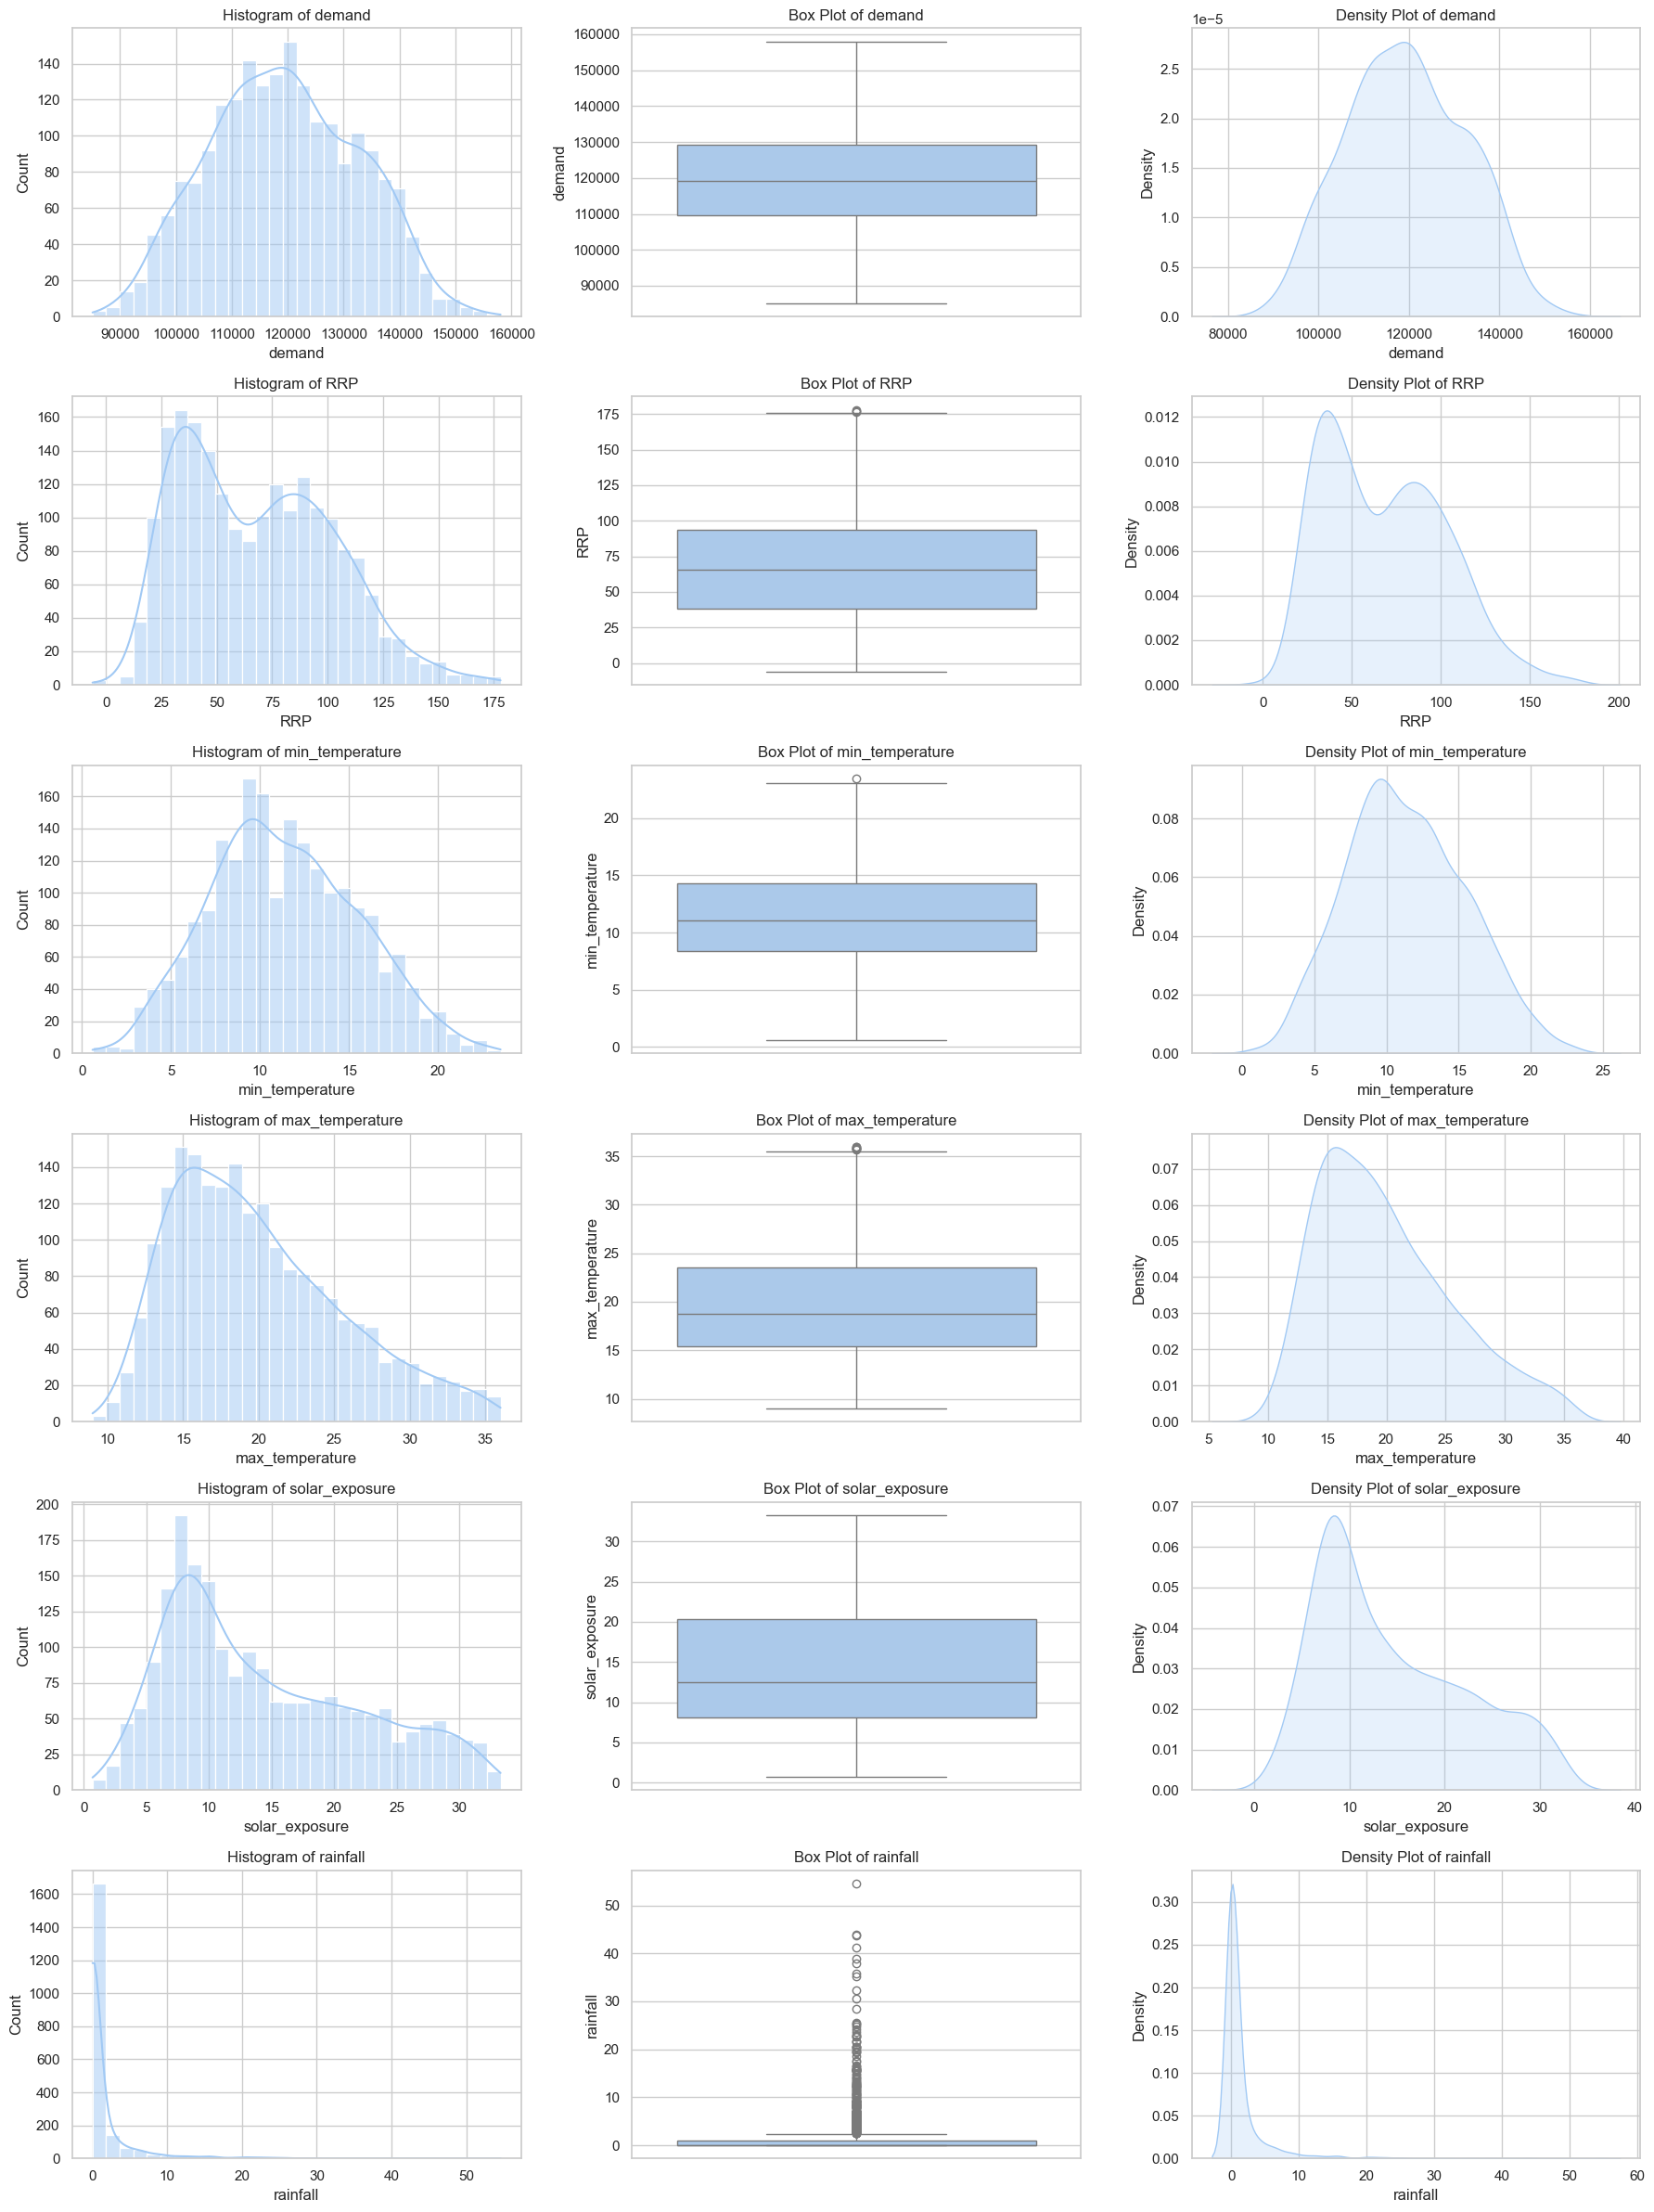

In [300]:
fig, axes = plt.subplots(len(numerical_vars), 3, figsize=(18, 4 * len(numerical_vars)))

for i, var in enumerate(numerical_vars):
    # Histogram
    sns.histplot(df_cleaned[var].dropna(), bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {var}')
    
    # Box Plot
    sns.boxplot(y=df_cleaned[var].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {var}')
    
    # KDE Density Plot (only if sufficient unique values exist)
    if df_cleaned[var].nunique() > 1:
        sns.kdeplot(df_cleaned[var].dropna(), fill=True, ax=axes[i, 2])
        axes[i, 2].set_title(f'Density Plot of {var}')
    else:
        axes[i, 2].set_title(f'Insufficient Data for KDE: {var}')

plt.tight_layout()
plt.show()

### 6. Categorical Variable Analysis

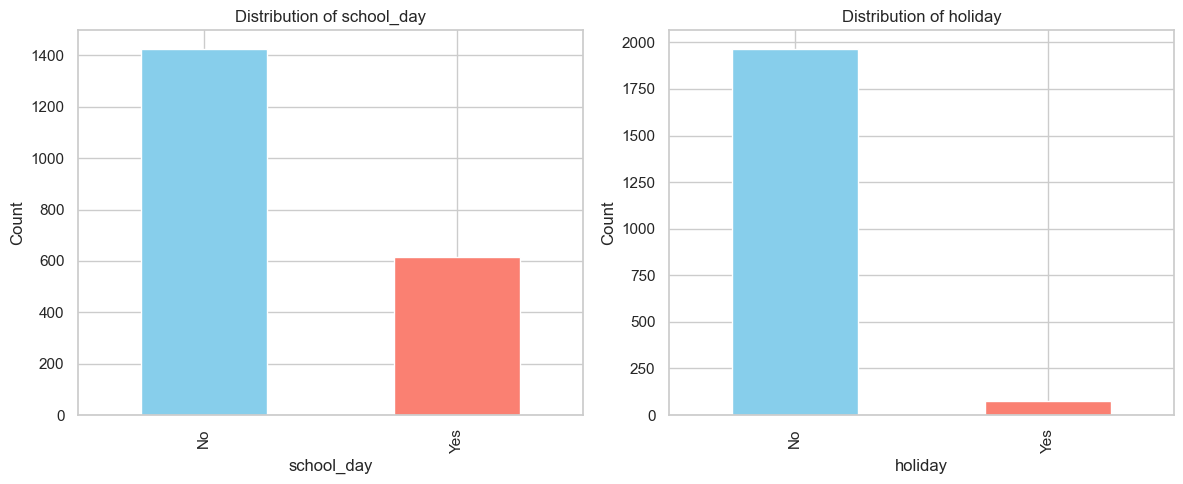

In [301]:
# Categorical Variables
categorical_vars = ['school_day', 'holiday']
fig, ax = plt.subplots(1, len(categorical_vars), figsize=(12, 5))

for i, var in enumerate(categorical_vars):
    df_cleaned[var].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], ax=ax[i])
    ax[i].set_title(f'Distribution of {var}')
    ax[i].set_xlabel(var)
    ax[i].set_ylabel('Count')
    ax[i].set_xticks([0, 1])
    ax[i].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

### 7. Correlation Heatmap (Demand vs. Weather Factors)

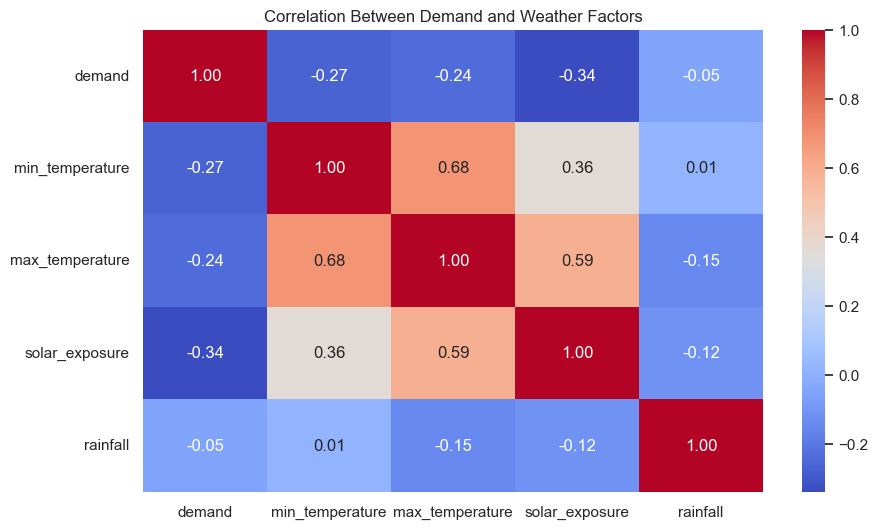

In [302]:
# Weather Impact Analysis
# Correlation Heatmap
df_weather = df_cleaned[['demand', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']]
plt.figure(figsize=(10, 6))
sns.heatmap(df_weather.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Demand and Weather Factors')
plt.show()


### 8. Scatter Plots (Demand vs. Weather Factors)

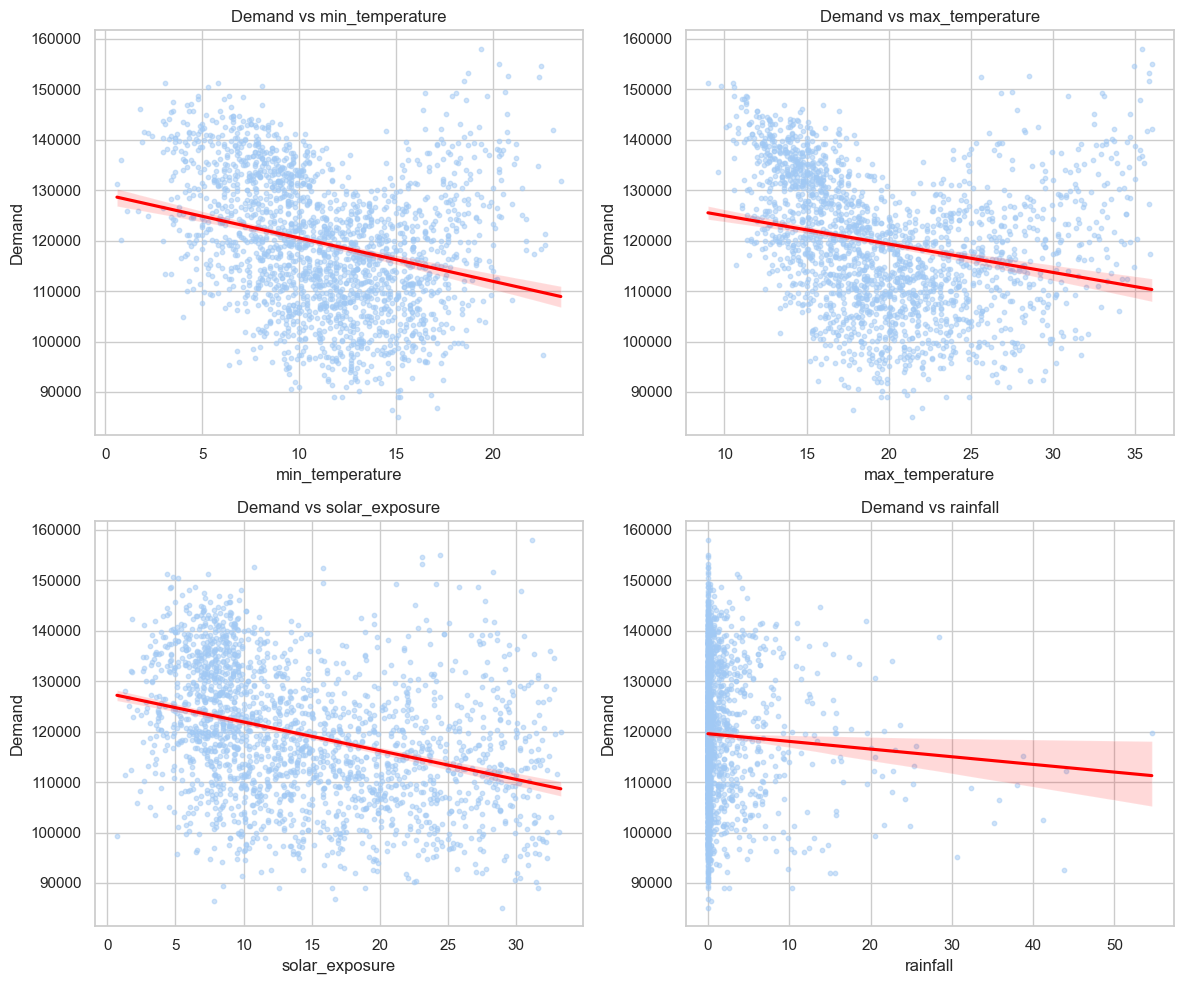

In [303]:
# Scatter Plots with Regression Lines
weather_vars = ['min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(weather_vars):
    valid_data = df_cleaned[[var, 'demand']].dropna()
    if not valid_data.empty:
        sns.regplot(x=valid_data[var], y=valid_data['demand'], ax=axes[i], scatter_kws={'alpha':0.5, 's':10}, line_kws={'color':'red'})
    axes[i].set_title(f'Demand vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Demand')

plt.tight_layout()
plt.show()

### 9. Season Classification

In [304]:
# First convert the index to datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned.set_index('date', inplace=True)


# Now extract month and assign seasons
df_cleaned['month'] = df_cleaned.index.month
df_cleaned['season'] = df_cleaned['month'].map({
    12: 'Summer', 1: 'Summer', 2: 'Summer',
    3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
    6: 'Winter', 7: 'Winter', 8: 'Winter',
    9: 'Spring', 10: 'Spring', 11: 'Spring'
})

# Rest of your code remains the same
# Check if all seasons exist
print("Unique Seasons:", df_cleaned['season'].unique())
print("Season Counts:\n", df_cleaned['season'].value_counts())

# Check month distribution
print("Month Counts:\n", df_cleaned['month'].value_counts())

Unique Seasons: ['Summer' 'Autumn' 'Winter' 'Spring']
Season Counts:
 season
Winter    549
Autumn    547
Spring    488
Summer    458
Name: count, dtype: int64
Month Counts:
 month
5     186
7     186
8     184
3     181
4     180
6     179
9     179
2     163
10    161
1     160
11    148
12    135
Name: count, dtype: int64


### 10. Electricity Demand by Season

C:\Users\saina\AppData\Local\Temp\ipykernel_12936\1907489123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='demand', data=df_cleaned,


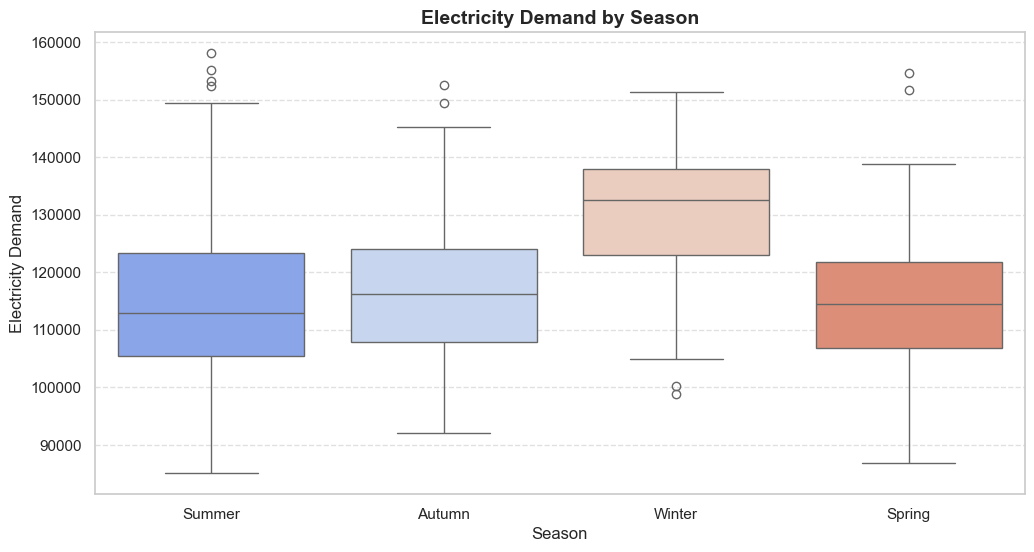

In [305]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='demand', data=df_cleaned, 
            order=['Summer', 'Autumn', 'Winter', 'Spring'], 
            palette='coolwarm')

plt.title('Electricity Demand by Season', fontsize=14, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Electricity Demand', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##  To analyze Operational Efficiency & Special Event Impact, we need to:

### 1️⃣ Study How Holidays & School Days 


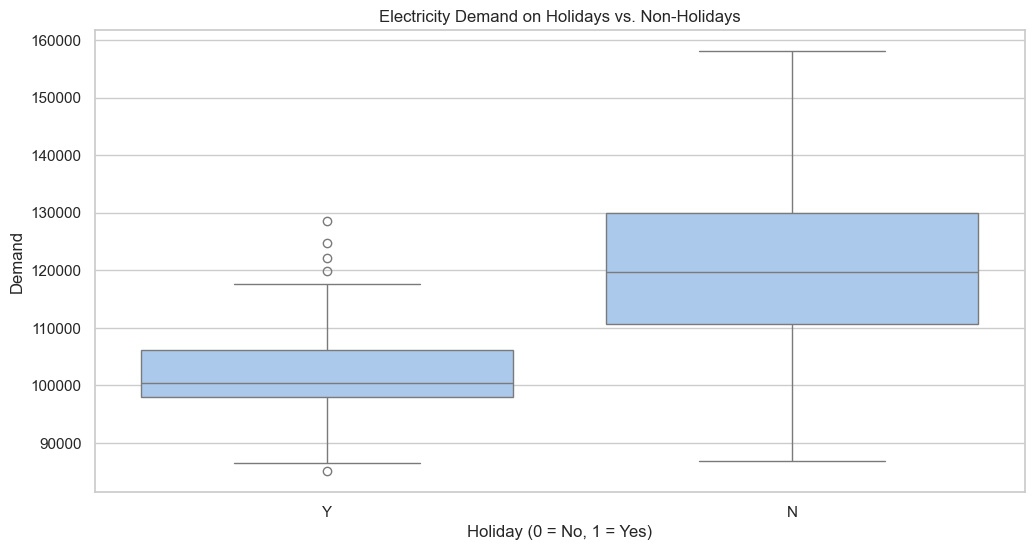

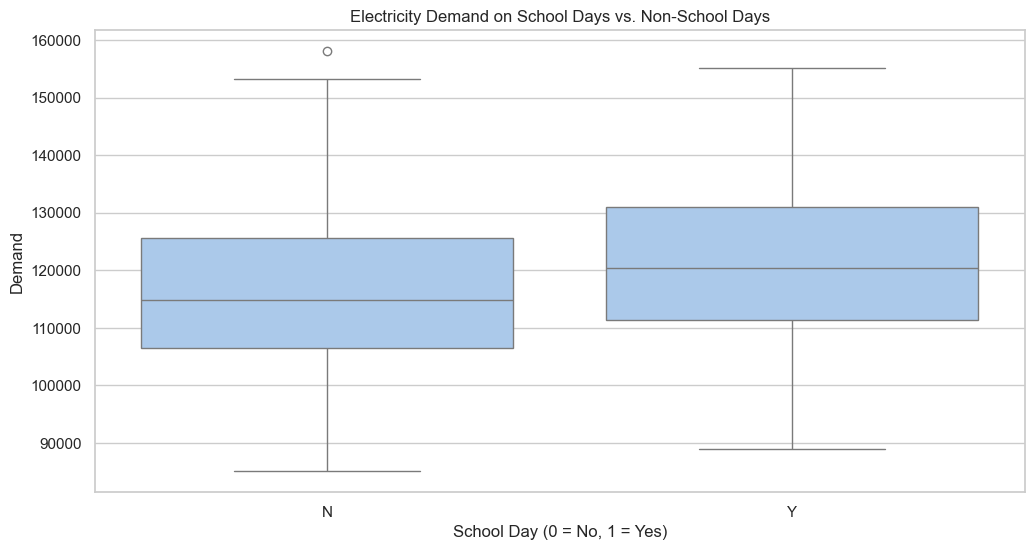

In [306]:
# Impact of Holidays and School Days on Demand
plt.figure(figsize=(12, 6))
sns.boxplot(x='holiday', y='demand', data=df_cleaned)
plt.title('Electricity Demand on Holidays vs. Non-Holidays')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Demand')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='school_day', y='demand', data=df_cleaned)
plt.title('Electricity Demand on School Days vs. Non-School Days')
plt.xlabel('School Day (0 = No, 1 = Yes)')
plt.ylabel('Demand')
plt.show()

# Anomaly Detection in Electricity Demand
### 1. Ensuring Date Index Format

In [307]:
df_cleaned.index = pd.to_datetime(df_cleaned.index)

### 2. Detecting Anomalies Using Z-Score

In [308]:
# Compute Z-score for anomaly detection
df_cleaned['demand_zscore'] = np.abs((df_cleaned['demand'] - df_cleaned['demand'].mean()) / df_cleaned['demand'].std())

# Lower the threshold to detect more anomalies
df_cleaned['is_anomaly'] = df_cleaned['demand_zscore'] > 2.0  # Lowered from 2.5


### 3. Debugging Anomaly Detection

In [309]:
# DEBUG: Print detected anomalies
print(df_cleaned[df_cleaned['is_anomaly']])
print(f"Total anomalies detected: {df_cleaned['is_anomaly'].sum()}")


                demand         RRP  demand_pos_RRP  RRP_positive  \
date                                                               
2015-01-21  148702.505   34.443415      148702.505     34.443415   
2015-01-22  153232.100   35.230761      153232.100     35.230761   
2015-02-10  145948.565   37.522600      145948.565     37.522600   
2015-02-11  149322.850   32.655454      149322.850     32.655454   
2015-06-02  148534.505   59.856033      148534.505     59.856033   
2015-06-03  146902.950   50.562684      146902.950     50.562684   
2015-06-04  147155.265   33.050285      147155.265     33.050285   
2015-07-14  150671.105   45.255583      150671.105     45.255583   
2015-07-15  151270.540   50.497418      151270.540     50.497418   
2015-07-20  146154.370   41.796713      146154.370     41.796713   
2015-08-04  147550.185   44.673336      147550.185     44.673336   
2015-08-18  148093.960   45.286687      148093.960     45.286687   
2015-12-18  158052.890   81.192486      158052.8

### 4. Visualizing Electricity Demand with Anomalies Highlighted

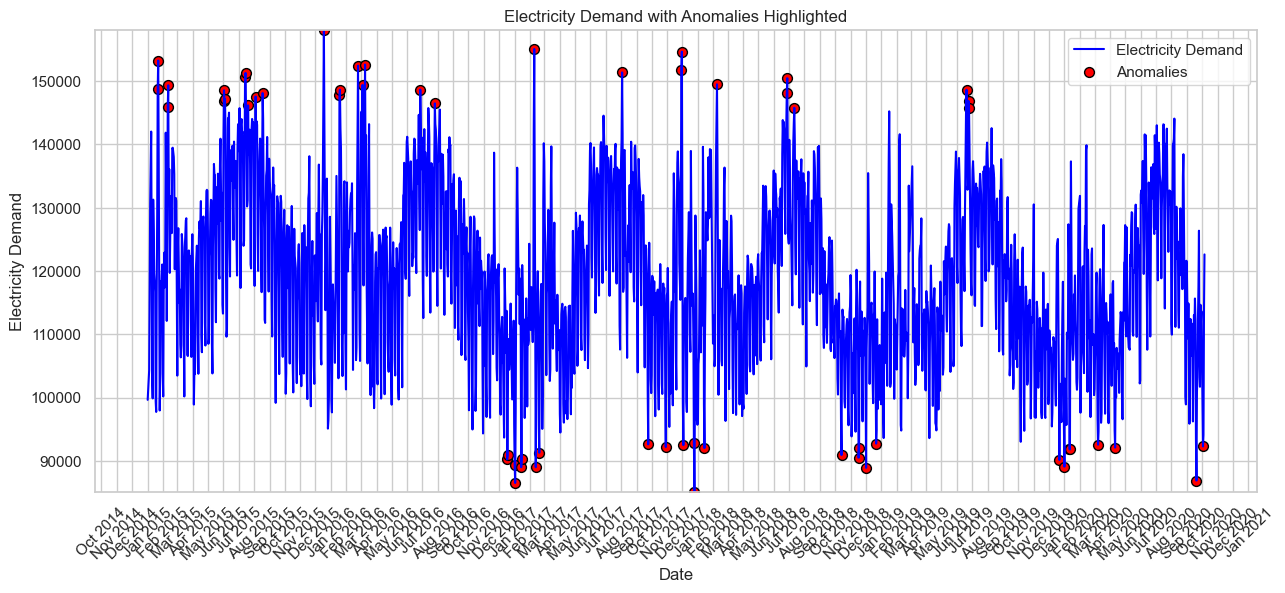

In [310]:
# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(df_cleaned.index, df_cleaned['demand'], label='Electricity Demand', color='blue')

# Highlight anomalies if any exist
anomalies = df_cleaned[df_cleaned['is_anomaly']]
if not anomalies.empty:
    plt.scatter(anomalies.index, anomalies['demand'], color='red', label='Anomalies', s=50, edgecolors='black')

# Formatting the x-axis for seasonality
plt.xlabel('Date')
plt.ylabel('Electricity Demand')
plt.title('Electricity Demand with Anomalies Highlighted')
plt.legend()

# Ensure all months are displayed on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)

# Adjust Y-limits dynamically
plt.ylim(df_cleaned['demand'].min() - 10, df_cleaned['demand'].max() + 10)

plt.grid(True)
plt.show()

### 5. Revenue and Cost Optimization

C:\Users\saina\AppData\Local\Temp\ipykernel_12936\171858415.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='RRP', data=df_cleaned, order=['Summer', 'Autumn', 'Winter', 'Spring'], palette='coolwarm')


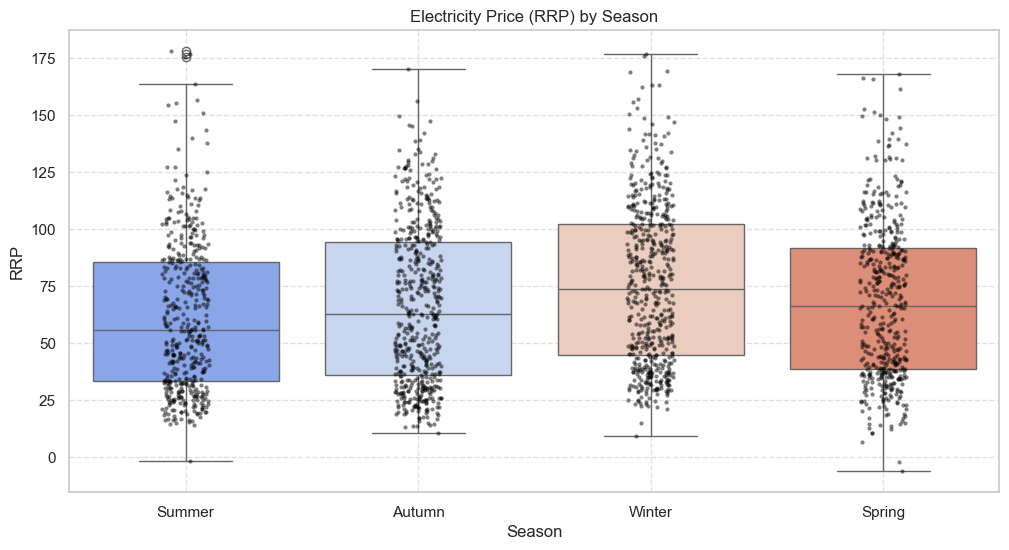

In [311]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='RRP', data=df_cleaned, order=['Summer', 'Autumn', 'Winter', 'Spring'], palette='coolwarm')
sns.stripplot(x='season', y='RRP', data=df_cleaned, color="black", alpha=0.5, size=3, jitter=True)
plt.title('Electricity Price (RRP) by Season')
plt.xlabel('Season')
plt.ylabel('RRP')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Electricity RRP Analysis with Negative RRP Periods Highlighted

### 1. Convert Index to DateTime

In [312]:
df_cleaned.index = pd.to_datetime(df_cleaned.index)

### 2. Extract Unique Years from Dataset

In [313]:
unique_years = sorted(df_cleaned.index.year.unique())

### 3. Plotting RRP Over Time & Highlighting Negative RRP Periods

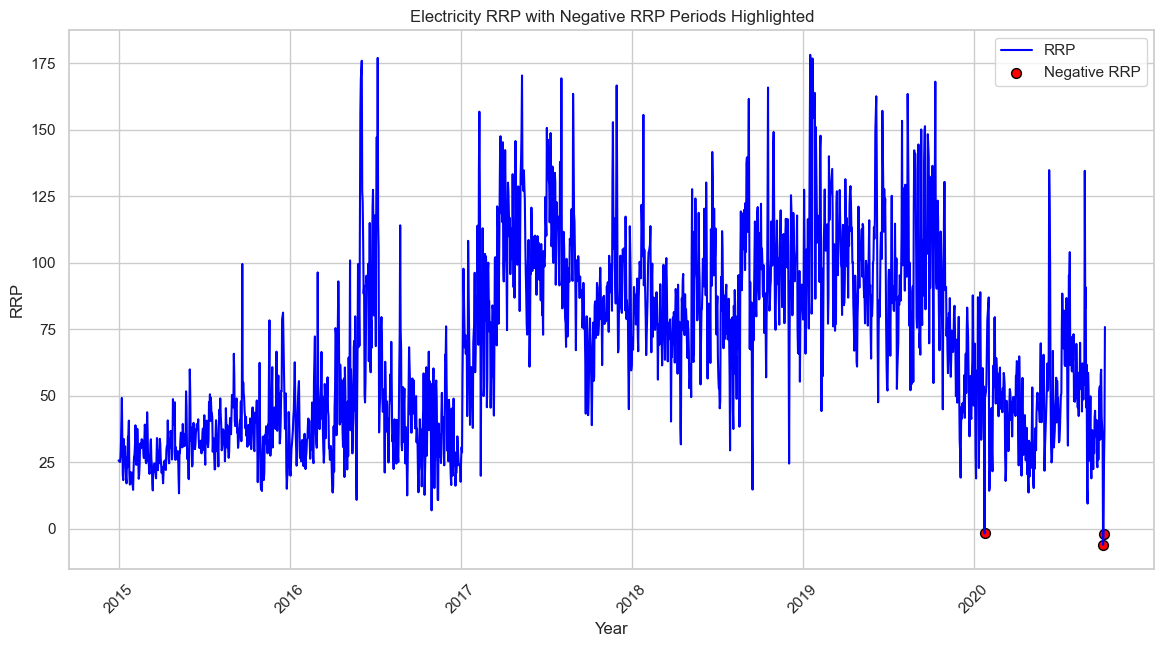

In [314]:
# Plot RRP, highlighting periods with negative RRP
plt.figure(figsize=(14, 7))
plt.plot(df_cleaned.index, df_cleaned['RRP'], label='RRP', color='blue')

# Highlight negative RRP periods
negative_rrp = df_cleaned[df_cleaned['RRP'] < 0]
plt.scatter(negative_rrp.index, negative_rrp['RRP'], color='red', label='Negative RRP', s=50, edgecolors='black')
plt.title('Electricity RRP with Negative RRP Periods Highlighted')
plt.xlabel('Year')
plt.ylabel('RRP')

# **Ensure all years are shown on the x-axis**
plt.xticks(
    ticks=[pd.Timestamp(f"{year}-01-01") for year in unique_years],  # Explicitly set all years
    labels=unique_years,
    rotation=45
)

# Optionally, use major tick formatting for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.grid(True)
plt.show()


# Summary of Insights and Recommendations
## Strategies for Revenue and Cost Efficiency:
### Adaptive Pricing & Flexible Demand:

#### 1.Implement adaptive pricing to balance supply and demand.

**Encourage usage during low-cost periods with flexible demand programs.**

**Offer incentives for reducing consumption during peak times.**

**Impact: Balances grid load, reduces costs, and stabilizes the system.**

#### 2.Energy Storage Solutions:

**Invest in technologies to store excess energy during off-peak times.**

**Store renewable energy when generation is high and demand is low.**

**Discharge stored energy during high-demand periods to stabilize prices.**

### Impact: Reduces reliance on non-renewable sources, lowers costs, and increases energy security.

#### 3.Smart Infrastructure & Predictive Maintenance:

**Develop and deploy smart grid technologies for real-time monitoring and control.**

**Use AI and machine learning for accurate demand forecasting.**

**Implement predictive maintenance to prevent critical failures.**

### Impact: Enhances efficiency, reduces operational costs, and ensures grid reliability.

#### 4.Balanced Energy Portfolio:

**Promote a diverse energy mix including renewables, hydro, and flexible sources like natural gas.**

**Support policies to encourage investment in various energy sources.**

### Impact: Enhances energy security, reduces emissions, and stabilizes the energy system.

### Readiness for Forecasting & Data Preparation:
#### 5.Essential Features:

**Time-based variables: Include day, week, hour to capture demand patterns.**

**Historical demand: Use past demand data for future predictions.**

**Weather conditions: Factor in temperature, humidity, etc.**

**Special events: Include holidays and events that impact demand.**

### Impact: Improves forecasting accuracy and relevance.

#### 6.Data Integrity:

**Ensure datasets are complete with no missing values.**

**Clean anomalies and outliers for accurate forecasts.**

### Impact: Increases data reliability, enhancing forecast accuracy.

#### 7.Data Transformation Techniques:

**Normalization & Scaling: Ensure features contribute equally to the model.**

#### 8.Encoding: Convert categorical variables into numerical form.

#### 9.Feature Engineering: Create new features for better insights.

### Impact: Enhances model performance and accuracy.

### These updated insights and recommendations should provide a clear path to optimizing revenue and costs, as well as enhancing forecasting readiness

## LABEL ENCODING FOR SCHOOL DAYS AND HOLIDAY

In [315]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your cleaned dataset
df_cleaned = pd.read_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv")

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'school_day' and 'holiday' columns
df_cleaned['school_day'] = label_encoder.fit_transform(df_cleaned['school_day'])
df_cleaned['holiday'] = label_encoder.fit_transform(df_cleaned['holiday'])

# Save the updated dataset back to the CSV file
df_cleaned.to_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv", index=False)

print(df_cleaned.head())

         date      demand        RRP  demand_pos_RRP  RRP_positive  \
0  2015-01-01   99635.030  25.633696       97319.240     26.415953   
1  2015-01-04  104330.715  25.005560      104330.715     25.005560   
2  2015-01-05  118132.200  26.724176      118132.200     26.724176   
3  2015-01-06  130672.485  31.282311      130672.485     31.282311   
4  2015-01-08  142015.655  49.117280      142015.655     49.117280   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0         2315.79         -7.24         0.020833             13.3   
1            0.00          0.00         0.000000             16.3   
2            0.00          0.00         0.000000             15.0   
3            0.00          0.00         0.000000             17.7   
4            0.00          0.00         0.000000             23.1   

   max_temperature  solar_exposure  rainfall  school_day  holiday  
0             26.9            23.6       0.0           0        1  
1             21.4          

## APPLYING ONE_HOT ENCODING FOR THE REQUIRED CATEGORICAL COLUMNS

In [316]:
import pandas as pd

# Load the cleaned dataset
df_cleaned = pd.read_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv")

# Inspect categorical variables (columns with dtype 'object')
categorical_vars = df_cleaned.select_dtypes(include=['object']).columns
print("All categorical variables:", categorical_vars)

# Identify low cardinality categorical columns (e.g., fewer than 10 unique values)
low_cardinality_vars = [col for col in categorical_vars if df_cleaned[col].nunique() < 10]
print("Low cardinality categorical variables:", low_cardinality_vars)

# One-hot encode these low cardinality variables
df_encoded = pd.get_dummies(df_cleaned, columns=low_cardinality_vars, drop_first=True)

print("Columns after one-hot encoding:")
print(df_encoded.columns)

All categorical variables: Index(['date'], dtype='object')
Low cardinality categorical variables: []
Columns after one-hot encoding:
Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday'],
      dtype='object')


## Datetime Encoding

In [317]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
df_cleaned = pd.read_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv")

# Convert the 'date' column to datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Extract date components
df_cleaned['year'] = df_cleaned['date'].dt.year
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['day'] = df_cleaned['date'].dt.day
df_cleaned['weekday'] = df_cleaned['date'].dt.weekday

# Optional: Cyclical encoding for the month
df_cleaned['month_sin'] = np.sin(2 * np.pi * df_cleaned['month'] / 12)
df_cleaned['month_cos'] = np.cos(2 * np.pi * df_cleaned['month'] / 12)

# Save the updated dataset back to cleaned_dataset.csv
df_cleaned.to_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv", index=False)
print("Updated cleaned dataset saved to cleaned_dataset.csv")


Updated cleaned dataset saved to cleaned_dataset.csv


##  Feature Scaling

In [318]:
from sklearn.preprocessing import StandardScaler

# List numerical columns (excluding the already encoded ones)
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = StandardScaler()
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])